In [1]:
import Merge_Cartesian as MC
from decimal import *
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from math import floor
from typing import List
import math
%matplotlib widget

# Sweep Over Input Variables

$T_L$ x $T_C$ = constant

In [11]:
def sweep_interval( TL_x_TC_constant : str,starting_TL: str, ending_TL : str, number_of_intervals : int, **kwargs):

    multiple_K = Decimal(TL_x_TC_constant)
    starting_TL = Decimal(starting_TL)
    ending_TL = Decimal(ending_TL)

    number_of_intervals = int(number_of_intervals)
    
    #Default Values
    kwarg_options = dict([
        ('L_impedance','100'), ('C_impedance','1'),('number_periods','1')])
    
    #Set Kwargs
    for key, item in kwargs.items():
        if(kwarg_options.get(key) is None):
            raise Exception(f"No setting found for {key}, here are the possible options: \n{kwarg_options}")
        else:
            kwarg_options[key] = item

    L_impedance = kwarg_options['L_impedance']
    C_impedance = kwarg_options['C_impedance']
    number_periods = kwarg_options['number_periods']

    data_inputs : List[MC.Data_Input_Storage]= []
    data_outputs : List[MC.Data_Output_Storage]= []
    data_outputs_merged : List[MC.Data_Output_Storage]= []
    data_outputs_ordered : List[MC.Data_Output_Storage_Ordered]= []

    interval = (ending_TL - starting_TL) / (number_of_intervals-1)

                    #   VOLTAGE  , PERIODS       , BUCK , LOAD
    Circuit_List =   ['1'      , number_periods, False, '12']

    labels = []
    labels_KL_KC = []
    for i in range(number_of_intervals):
        TL = starting_TL + i*interval
        TC = multiple_K/TL
        
        labels.append(f"TL = {str(TL)}, TC = {str(TC)}")
        
                            #  IMPEDANCE     ,TIME    ,LENGTH
        Inductor_List =    [L_impedance   ,str(TL)  ,'1']
        Capacitor_List =   [C_impedance   ,str(TC)  ,'1']
        # print(f"Interval {i+1}")
        # print(f"TL {TL}")
        # print(f"TC {TC}")
        # print(f"TLxTC {TL*TC}")
        # print('---')
        
        (data_input,
        data_output,
        data_output_merged, 
        data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)
        
        data_inputs.append(data_input)
        data_outputs.append(data_output)
        data_outputs_merged.append(data_output_merged)
        data_outputs_ordered.append(data_output_ordered)
        labels_KL_KC.append(f"KL = {data_input.Inductor_LCM_Factor} KC = {data_input.Capacitor_LCM_Factor}")
        
    return(data_inputs,
           data_outputs,
           data_outputs_merged,
           data_outputs_ordered,
           labels,
           labels_KL_KC)

In [12]:
def sweep_factors_of_integer(TL_x_TC_constant : int, **kwargs):
    #Default Values
    kwarg_options = dict([
        ('L_impedance','100'), ('C_impedance','1'),('number_periods','1')])
    
    #Set Kwargs
    for key, item in kwargs.items():
        if(kwarg_options.get(key) is None):
            raise Exception(f"No setting found for {key}, here are the possible options: \n{kwarg_options}")
        else:
            kwarg_options[key] = item
            
    data_inputs : List[MC.Data_Input_Storage]= []
    data_outputs : List[MC.Data_Output_Storage]= []
    data_outputs_merged : List[MC.Data_Output_Storage]= []
    data_outputs_ordered : List[MC.Data_Output_Storage_Ordered]= []

    L_impedance = kwarg_options['L_impedance']
    C_impedance = kwarg_options['C_impedance']
    number_periods = kwarg_options['number_periods']
    
    Circuit_List =   ['1'      , number_periods, False, '12']
    labels = [] # [TL,TC]
    labels_KL_KC = [] # [TL,TC]
    
    for i in range(1,TL_x_TC_constant +1):
        if TL_x_TC_constant%i == 0:
            TL = i
            TC = int(TL_x_TC_constant/i)
            
            labels.append(f"TL = {TL} TC = {TC}")
                                        #  IMPEDANCE     ,TIME    ,LENGTH
            Inductor_List =    [L_impedance   ,str(TL)  ,'1']
            Capacitor_List =   [C_impedance   ,str(TC)  ,'1']
            
            (data_input,
            data_output,
            data_output_merged, 
            data_output_ordered) = MC.Full_Cycle(Inductor_List,Capacitor_List, Circuit_List,False)
            
            data_inputs.append(data_input)
            data_outputs.append(data_output)
            data_outputs_merged.append(data_output_merged)
            data_outputs_ordered.append(data_output_ordered)
            labels_KL_KC.append(f"KL = {data_input.Inductor_LCM_Factor} KC = {data_input.Capacitor_LCM_Factor}")
            
    return(data_inputs,
        data_outputs,
        data_outputs_merged,
        data_outputs_ordered,
        labels,
        labels_KL_KC)


In [16]:
is_interval = True

if is_interval :
    number_of_intervals = 6
    
    (data_inputs,
    data_outputs,
    data_outputs_merged,
    data_outputs_ordered,
    labels,
    labels_KL_KC) = sweep_interval('12','1','12',number_of_intervals)
else:
    (data_inputs,
    data_outputs,
    data_outputs_merged,
    data_outputs_ordered,
    labels,
    labels_KL_KC) =sweep_factors_of_integer(12,L_impedance = '1000')

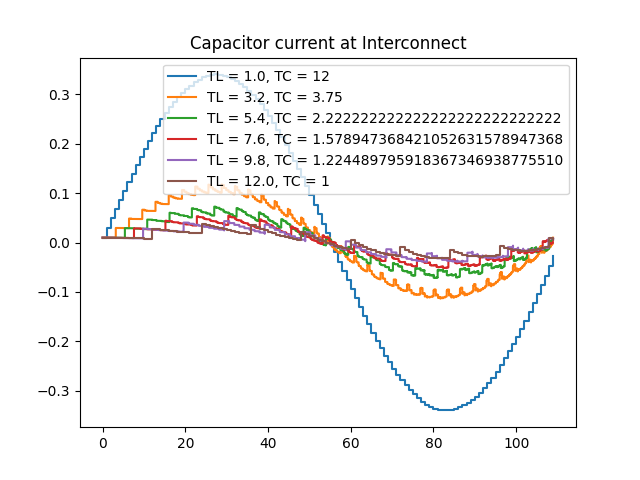

In [18]:
fig, ax = plt.subplots()

for data_ouput_ordered,label in zip(data_outputs_ordered,labels) :
    MC.plot_time_interconnect(data_ouput_ordered,ax,'current capacitor',True)
    
# ax.legend(labels_KL_KC)
ax.legend(labels)

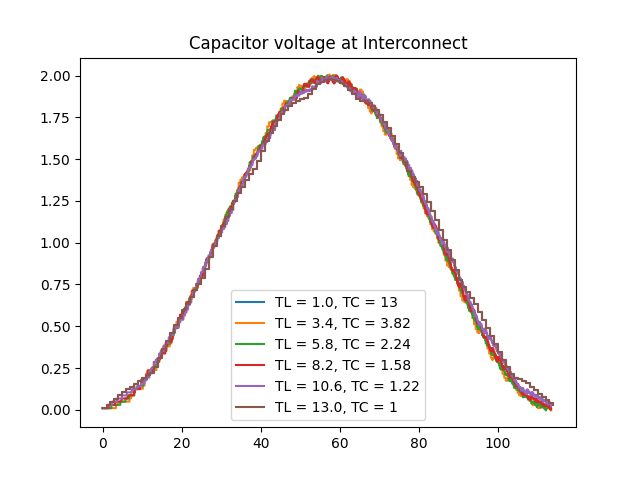

In [6]:
fig_voltage, ax_voltage = plt.subplots()

for data_ouput_ordered,label in zip(data_outputs_ordered[:],labels[:]) :
    MC.plot_time_interconnect(data_ouput_ordered,ax_voltage,'voltage capacitor',True)
    
ax_voltage.legend(labels[:])

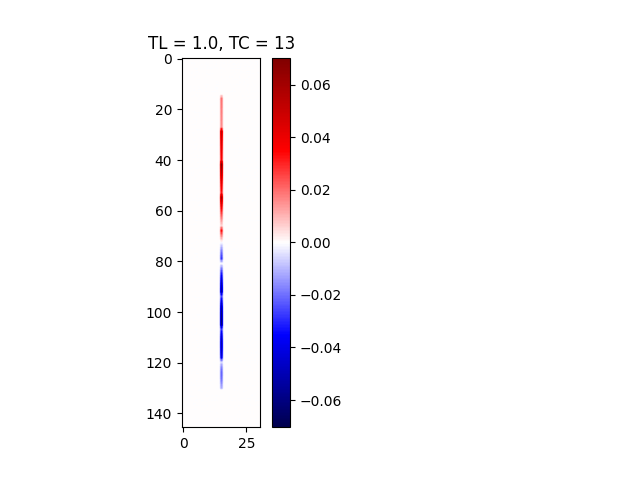

In [7]:
fig_fanouts = plt.figure()

start_num = 0
finish_num = 1#len(labels)

number_of_items = len(labels[start_num:finish_num])
i =1
for data_input,data_output_merged, label in zip(data_inputs[start_num:finish_num],data_outputs_merged[start_num:finish_num],labels[start_num:finish_num]):
    if number_of_items%2 == 0:
        ax_fanout = fig_fanouts.add_subplot(number_of_items/2,2,i)
    else:
        ax_fanout = fig_fanouts.add_subplot(floor(number_of_items/2)+1,2,i)
    KL = data_input.Inductor_LCM_Factor
    KC = data_input.Capacitor_LCM_Factor
    
    number_merge_cycles = math.ceil(data_input.Number_of_Layers/KC) + 1
    # merged_length = number_merge_cycles*KC
    merged_length = math.ceil(data_input.Simulation_Stop_Time/data_input.Inductor_Time)
    
    MC.plot_fanout_seismic(data_output_merged.Voltage_Interconnect_Capacitor[0:merged_length:],ax_fanout,label)
    i += 1

In [8]:
number_of_items

1